# EXPLORATORY DATA ANALYSIS- RETAIL
## AUTHOR : Aman Agrawal
## BUSINESS PROBLEM
### We are given Superstore Data Set,where we need to perform Exploratory Data Analysis .
### As a business manager, we need to find out the weak areas where we can work to make more profit.
### What all business problems we can derive by exploring the data?


In [1]:
#filter out warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#import dataset
retail=pd.read_csv("SampleSuperstore .csv.")

In [4]:
# To read Data where we will get top 5 rows.
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
retail.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
# To check the columns of the data
retail.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
# To check the data type
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# To check the structure of Dataset i.e the number of columns and rows
retail.shape

(9994, 13)

In [9]:
#To check for missing values in the data
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
# To check whether we have any duplicacy in  Dataset or not 
retail.duplicated().sum()

17

In [11]:
# Since we have 17 duplicate rows we need to drop them for further Analysis
retail=retail.drop_duplicates()

In [12]:
#Chceking the shape of the data after dropping the duplicate records
retail.shape

(9977, 13)

In [13]:
# To check the aggregates of the Data Set 
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [14]:
# To find out  Sales and Profit generated by the Superstore
print("TOTAL SALES:",retail['Sales'].sum())
print("TOTAL PROFIT:",retail['Profit'].sum())

TOTAL SALES: 2296195.5903
TOTAL PROFIT: 286241.4226


# REGIONAL ANALYSIS

In [15]:
retail1 = retail.groupby(["Region", "Category"]).sum()
retail1 = retail1.reset_index()
retail1

,Region,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Central,Furniture,31450757,163407.1938,1824,143.04,-2906.1467
1,Central,Office Supplies,92607360,166959.3470,5400,358.20,8864.5899
2,Central,Technology,27465071,170416.3120,1544,55.90,33697.4320
3,East,Furniture,10364437,208009.8320,2212,92.30,3058.2246
4,East,Office Supplies,29762320,205451.3830,6455,244.50,40986.0495
5,East,Technology,9972581,264973.9810,1942,76.70,47462.0351
6,South,Furniture,11471303,117298.6840,1291,40.35,6771.2061
7,South,Office Supplies,34072173,125651.3130,3800,166.60,19986.3928
8,South,Technology,10331576,148771.9080,1118,31.60,19991.8314
9,West,Furniture,64719968,252590.6035,2693,92.90,11498.5297


# Visualisation of data

<AxesSubplot:title={'center':'Total Number of Products Sold in Each Region'}, xlabel='Region', ylabel='Quantity'>

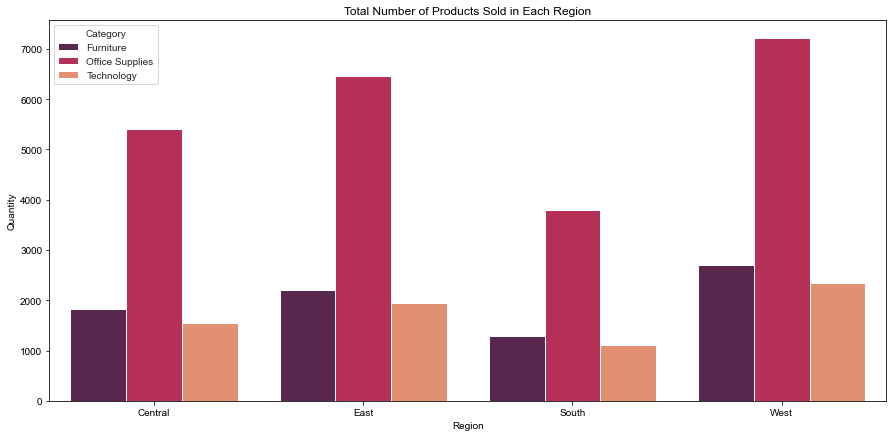

In [16]:
# Ploting the graph for each region v/s Quantity

plt.figure(figsize=(15,7))
plt.title("Total Number of Products Sold in Each Region")
sns.set_style("whitegrid")
sns.barplot(x = 'Region', y =  'Quantity', hue= "Category", palette= 'rocket', data = retail1)

<AxesSubplot:title={'center':'Total Sales Made by Products in Each Region'}, xlabel='Region', ylabel='Sales'>

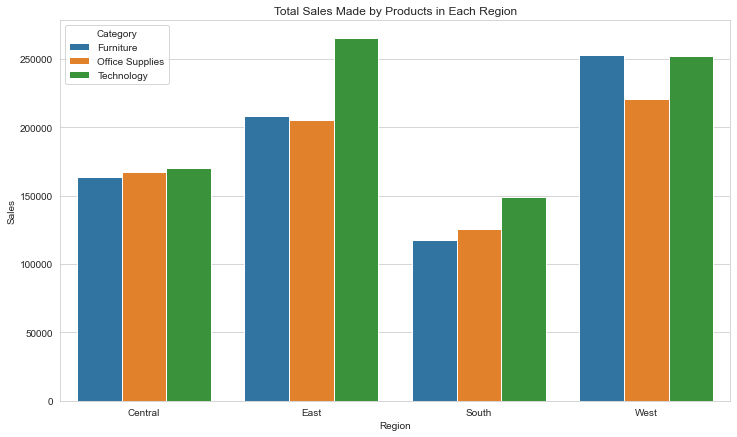

In [17]:
# Ploting the graph for each region v/s sales

plt.figure(figsize=(12,7))
plt.title("Total Sales Made by Products in Each Region")
sns.set_style("whitegrid")
sns.barplot(x = 'Region', y =  'Sales', hue= "Category", data = retail1)

# CUSTOMER ANALYSIS

Text(0.5, 1.0, 'SEGMENT WISE SALES AND PROFIT')

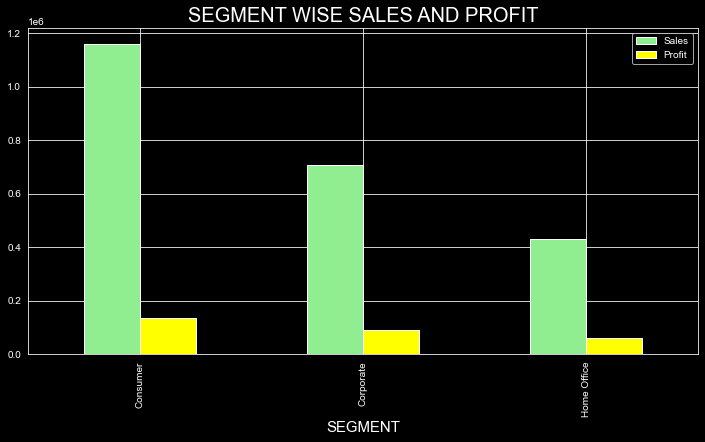

In [18]:
# To check maximum Sales and Profit in each segment
plt.style.use('dark_background')
retail.groupby(['Segment'])['Sales','Profit'].sum().plot.bar(color=['lightgreen','yellow'],figsize=(12,6))
plt.xlabel("SEGMENT",fontdict={'color':'white','fontsize':15})
plt.title("SEGMENT WISE SALES AND PROFIT",fontdict={'color':'white','fontsize':20})

### So the graph presents that Consumer segment is the one which has maximum buying capacity. Also they give maximum profit to Superstore whereas Home Office purchases less and add much lesser profit to business

In [19]:
retail=retail.rename(columns={'Ship Mode':'Ship_mode'})

Text(0.5, 1.0, 'SEGMENT WISE SHIP MODE')

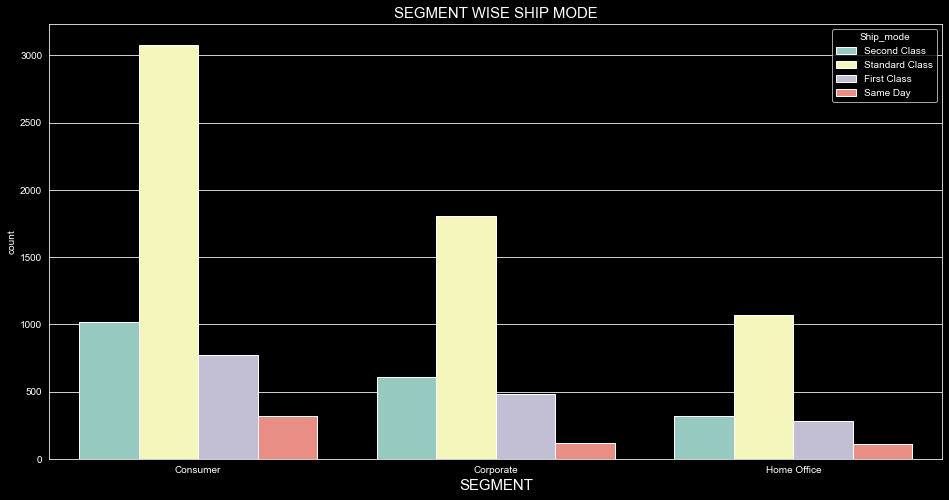

In [20]:
#Checking Ship Mode Segment wise
plt.style.use('dark_background')
plt.subplots(figsize=(16,8))
sns.countplot(x='Segment',hue='Ship_mode',data=retail)
plt.xlabel('SEGMENT',fontdict={'color':'white','fontsize':15})
plt.title("SEGMENT WISE SHIP MODE",fontdict={'color':'white','fontsize':15})

### In each segment most of the transaction has been shipped under Standard Class

# CITY ANALYSIS

Text(0.5, 1.0, 'CITY WISE SALES')

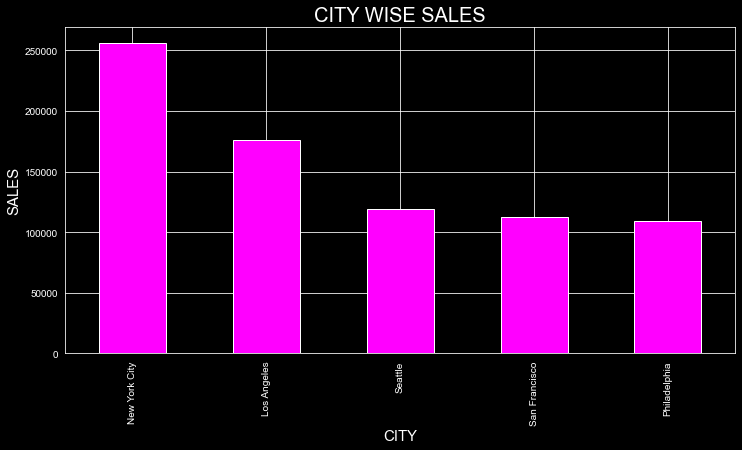

In [21]:
#To check top 5 cities based on Sales
plt.style.use('dark_background')
retail.groupby(['City'])['Sales'].sum().sort_values(ascending=False).head().plot.bar(color=['#FF00FF'],figsize=(12,6))
plt.xlabel("CITY",fontdict={'color':'white','fontsize':15})
plt.ylabel("SALES",fontdict={'color':'white','fontsize':15})
plt.title("CITY WISE SALES",fontdict={'color':'white','fontsize':20})

### New York City is giving the store the highest sales followed by Los Angeles and Seattle

Text(0.5, 1.0, 'CITY WISE PROFIT')

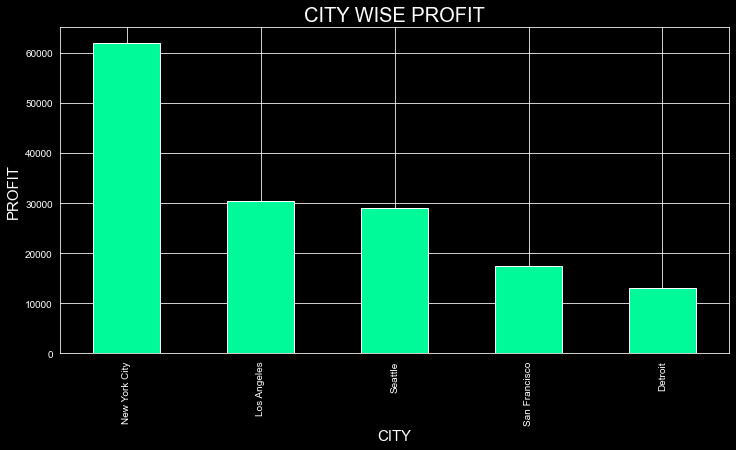

In [22]:
#To check the profit earned from the top 5 ciies
plt.style.use('dark_background')
retail.groupby(['City'])['Profit'].sum().sort_values(ascending=False).head().plot.bar(color=['#00FA9A'],figsize=(12,6))
plt.xlabel("CITY",fontdict={'color':'white','fontsize':15})
plt.ylabel("PROFIT",fontdict={'color':'white','fontsize':15})
plt.title("CITY WISE PROFIT",fontdict={'color':'white','fontsize':20})

### Similarly maximum profit is generated from New York City followed by Los Angeles and Seattle.

Text(0.5, 1.0, 'CITY WISE DISCOUNT')

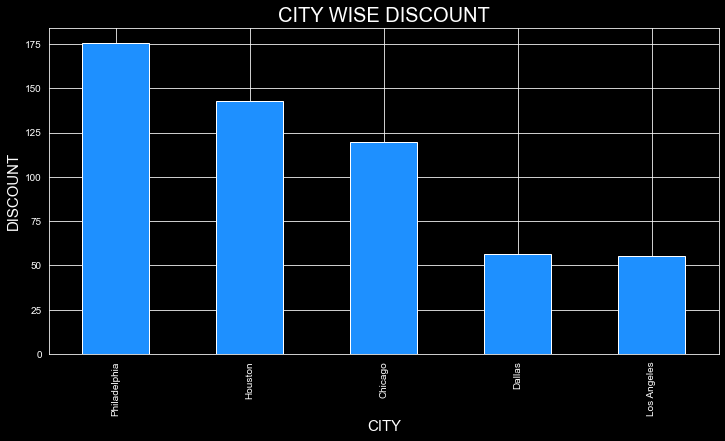

In [23]:
#To check top 5 cities based on total discount given
plt.style.use('dark_background')
retail.groupby(['City'])['Discount'].sum().sort_values(ascending=False).head().plot.bar(color=['#1E90FF'],figsize=(12,6))
plt.xlabel("CITY",fontdict={'color':'white','fontsize':15})
plt.ylabel("DISCOUNT",fontdict={'color':'white','fontsize':15})
plt.title("CITY WISE DISCOUNT",fontdict={'color':'white','fontsize':20})

###  Interestingly highest total discount is given to Philadelphia followed by Houston and Chicago. But they do not lead the Sales and Profit table

Text(0.5, 1.0, 'CITIES GIVING LEAST PROFIT')

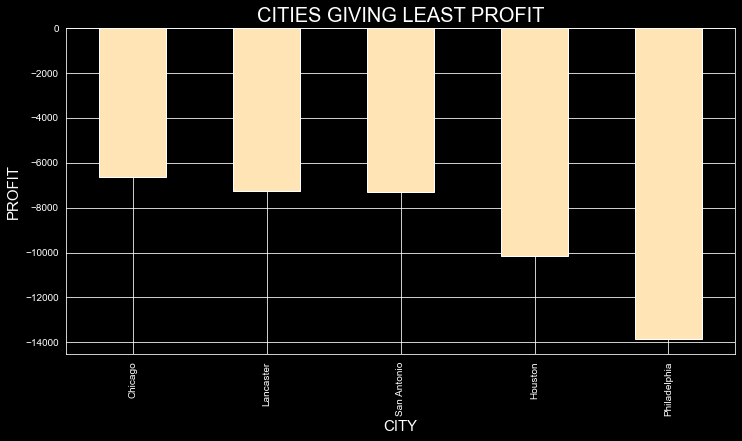

In [24]:
#To check the 5 cities that are giving me loss
plt.style.use('dark_background')
retail.groupby(['City'])['Profit'].sum().sort_values(ascending=False).tail().plot.bar(color=['#FFE4B5'],figsize=(12,6))
plt.xlabel("CITY",fontdict={'color':'white','fontsize':15})
plt.ylabel("PROFIT",fontdict={'color':'white','fontsize':15})
plt.title("CITIES GIVING LEAST PROFIT",fontdict={'color':'white','fontsize':20})

## Philadelphia followed by Houston and San Antonio are giving the least profits

# TOP PRODUCTS

Text(0.5, 1.0, 'SUB-CATEGORY WISE SALES')

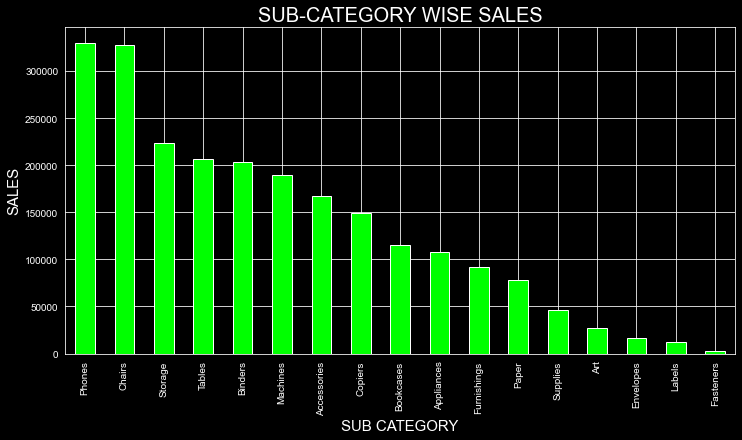

In [25]:
# Now we will check the Top Products Sold
plt.style.use('dark_background')
retail.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False).plot.bar(color=['#00FF00'],figsize=(12,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'white','fontsize':15})
plt.ylabel("SALES",fontdict={'color':'white','fontsize':15})
plt.title("SUB-CATEGORY WISE SALES",fontdict={'color':'white','fontsize':20})

Text(0.5, 1.0, 'SUB-CATEGORY WISE PROFIT')

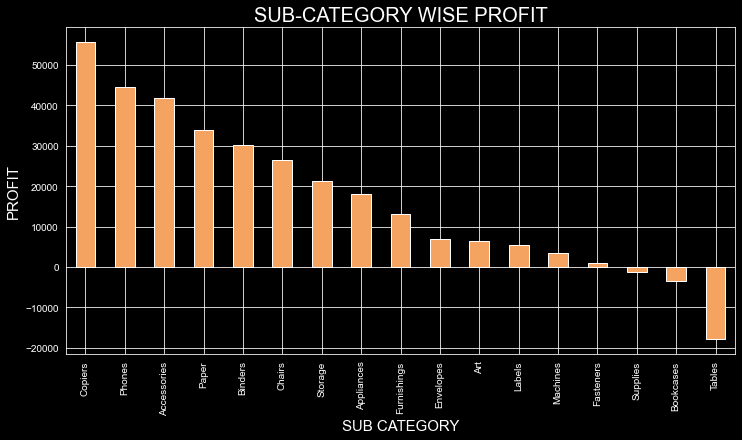

In [26]:
#To check the profit earned from all the Sub-Categories
plt.style.use('dark_background')
retail.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False).plot.bar(color=['#F4A460'],figsize=(12,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'white','fontsize':15})
plt.ylabel("PROFIT",fontdict={'color':'white','fontsize':15})
plt.title("SUB-CATEGORY WISE PROFIT",fontdict={'color':'white','fontsize':20})

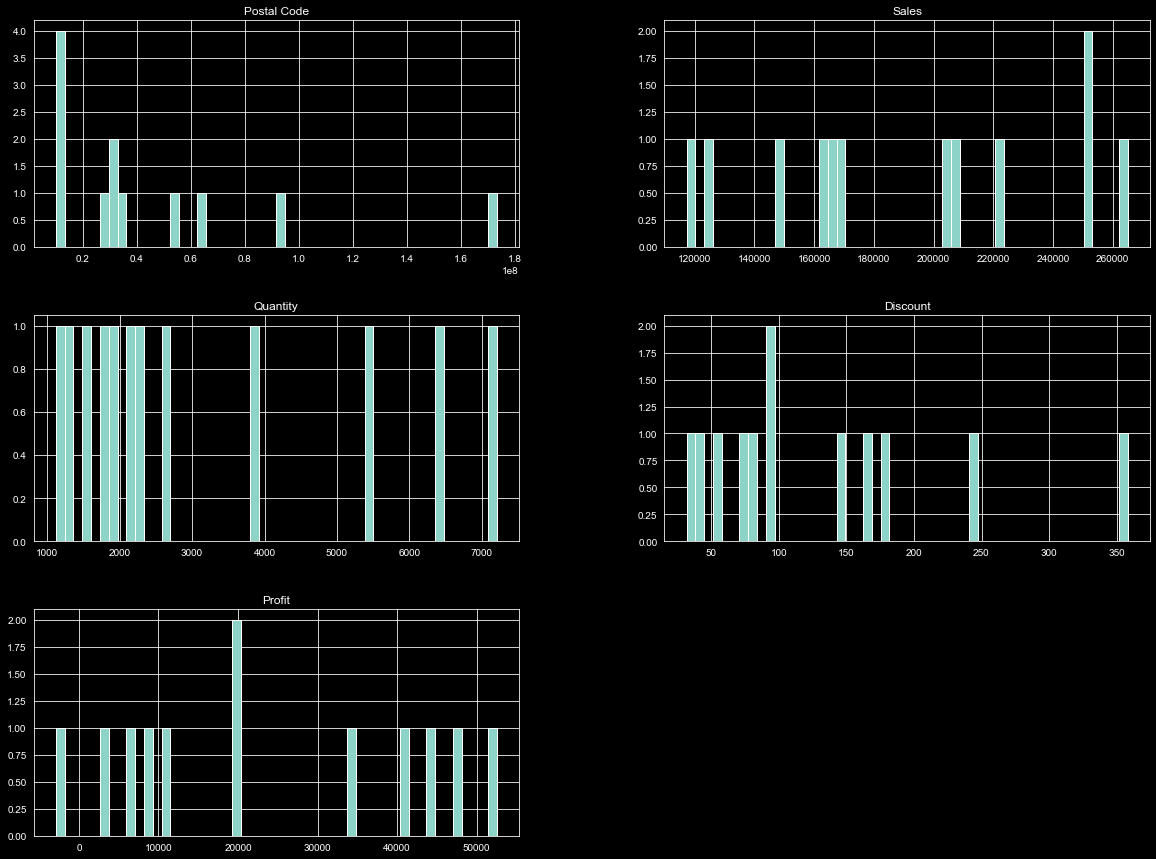

In [27]:
retail1.hist(bins=50,figsize=(20,15))
plt.show()

In [28]:
# Now we will make another subset to analyze subcategory items by different parameters.

retail2 = retail[["Sub-Category", "Sales", "Profit","Quantity"]]
retail2 = retail2.groupby(["Sub-Category"]).sum()
retail2 = retail2.sort_values("Quantity", ascending= False)
retail2 = retail2.reset_index()
retail2

,Sub-Category,Sales,Profit,Quantity
0,Binders,203409.1690,30228.0003,5971
1,Paper,78224.1420,33944.2395,5144
2,Furnishings,91683.0240,13052.7230,3560
3,Phones,330007.0540,44515.7306,3289
4,Storage,223843.6080,21278.8264,3158
5,Art,27107.0320,6524.6118,2996
6,Accessories,167380.3180,41936.6357,2976
7,Chairs,327777.7610,26567.1278,2351
8,Appliances,107532.1610,18138.0054,1729
9,Labels,12444.9120,5526.3820,1396


<AxesSubplot:title={'center':'Number of items sold'}, xlabel='Sub-Category', ylabel='Quantity'>

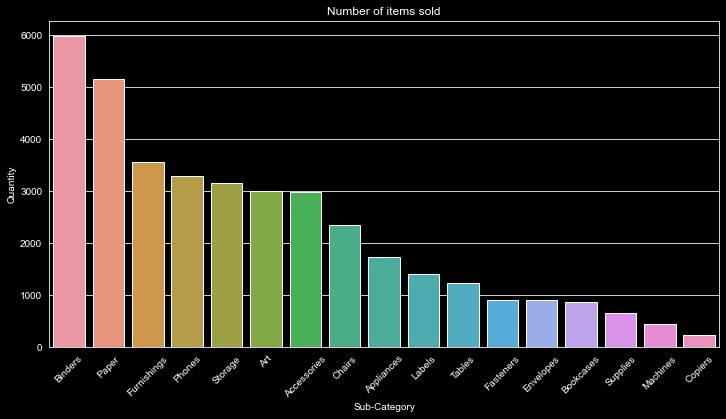

In [29]:
plt.figure(figsize=(12,6))
plt.title("Number of items sold")
plt.xticks(rotation = 45)
sns.barplot(x= "Sub-Category", y= "Quantity", data = retail2)

In [30]:
retail3= retail2[["Sub-Category", "Sales", "Profit"]]
retail3.set_index("Sub-Category", inplace= True)
retail3

,Sales,Profit
Sub-Category,,
Binders,203409.1690,30228.0003
Paper,78224.1420,33944.2395
Furnishings,91683.0240,13052.7230
Phones,330007.0540,44515.7306
Storage,223843.6080,21278.8264
Art,27107.0320,6524.6118
Accessories,167380.3180,41936.6357
Chairs,327777.7610,26567.1278
Appliances,107532.1610,18138.0054


Text(0.5, 1.0, 'Comparison between Sales and Profit of Products')

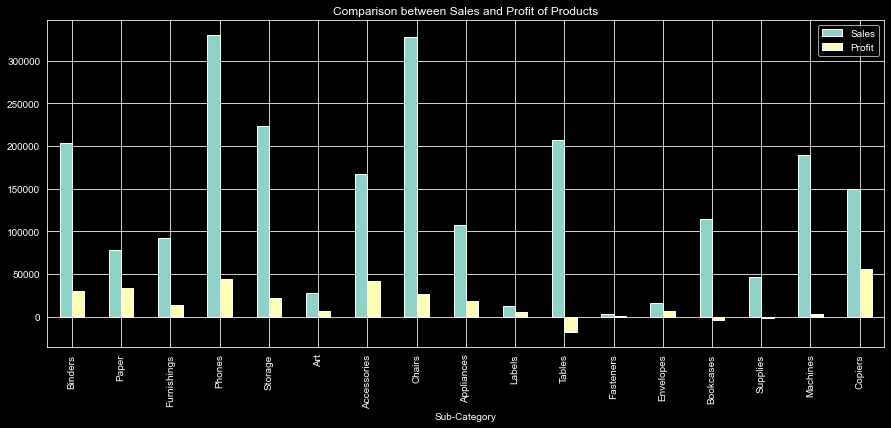

In [31]:
# Ploting the graph to find the relationship between sales and profit.

plt.rcParams['figure.figsize']= (15,6)
retail3.plot(kind='bar')
plt.title("Comparison between Sales and Profit of Products")

In [32]:
# Making another subset to analyze data by state

retail4 = retail[["State", "Sales", "Profit", "Quantity", "Discount"]]
retail4 = retail4.groupby(["State"]).sum()
retail4 = retail4.sort_values("Quantity", ascending= False)
retail4= retail4.reset_index()
retail4.head(15)

,State,Sales,Profit,Quantity,Discount
0,California,457576.2715,76330.7891,7649,145.60
1,New York,310827.1510,74015.4622,4220,62.40
2,Texas,170124.5418,-25750.9833,3718,364.24
3,Pennsylvania,116496.3620,-15565.4035,2150,192.70
4,Washington,138560.8100,33368.2375,1871,32.40
5,Illinois,80162.5370,-12601.6500,1842,191.10
6,Ohio,77976.7640,-16959.3178,1757,152.10
7,Florida,89473.7080,-3399.3017,1379,114.65
8,North Carolina,55603.1640,-7490.9122,983,70.60
9,Michigan,75879.6440,24428.0903,943,1.80


Text(0, 0.5, 'Number of products sold')

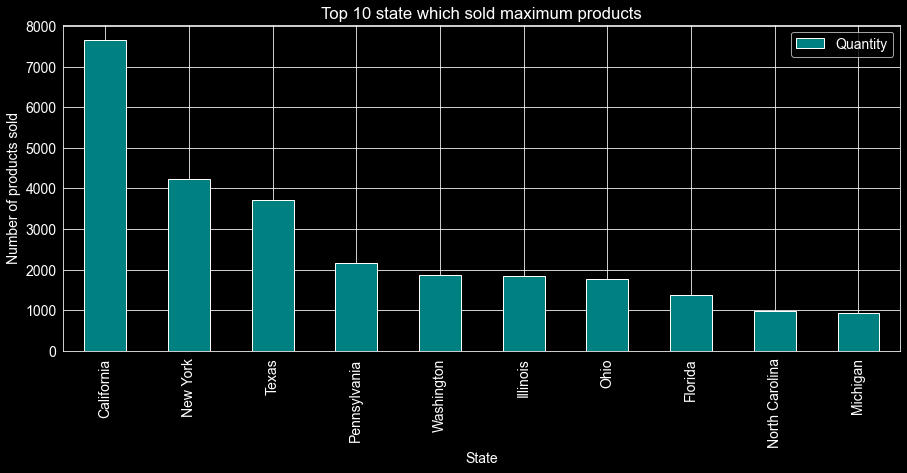

In [33]:
# Ploting the graph for top 10 state which sold maximum products.

plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (15,6)
retail4.head(10).plot(kind='bar', x= "State", y= "Quantity", color= 'teal')
plt.title("Top 10 state which sold maximum products")
plt.ylabel("Number of products sold")

In [34]:
retail5= retail4[["State", "Sales", "Profit"]]
retail5.set_index("State", inplace= True)
retail5

,Sales,Profit
State,,
California,457576.2715,76330.7891
New York,310827.1510,74015.4622
Texas,170124.5418,-25750.9833
Pennsylvania,116496.3620,-15565.4035
Washington,138560.8100,33368.2375
Illinois,80162.5370,-12601.6500
Ohio,77976.7640,-16959.3178
Florida,89473.7080,-3399.3017
North Carolina,55603.1640,-7490.9122


Text(0.5, 1.0, 'Comparison between Sales and Profit of Products in top 10 state')

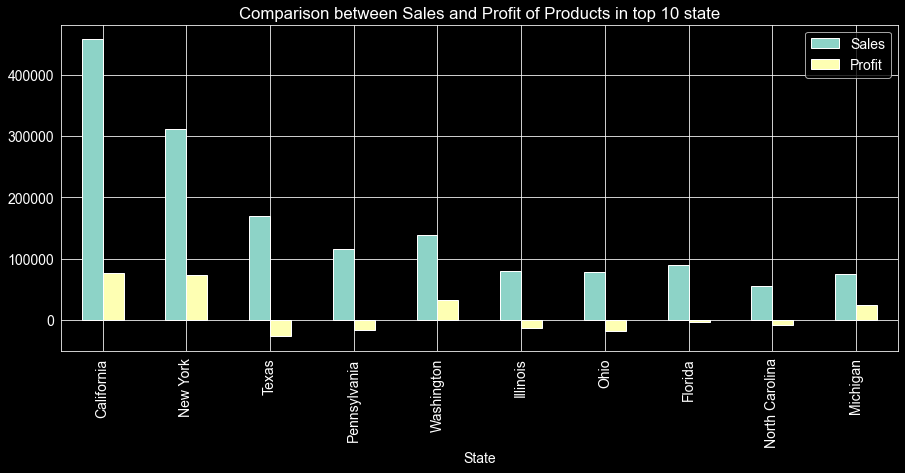

In [35]:
# Ploting the graph for each state to know how much profit they made in comparison to sale.

plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (15,6)
retail5.head(10).plot(kind='bar')
plt.title("Comparison between Sales and Profit of Products in top 10 state")

Text(0, 0.5, 'Discount')

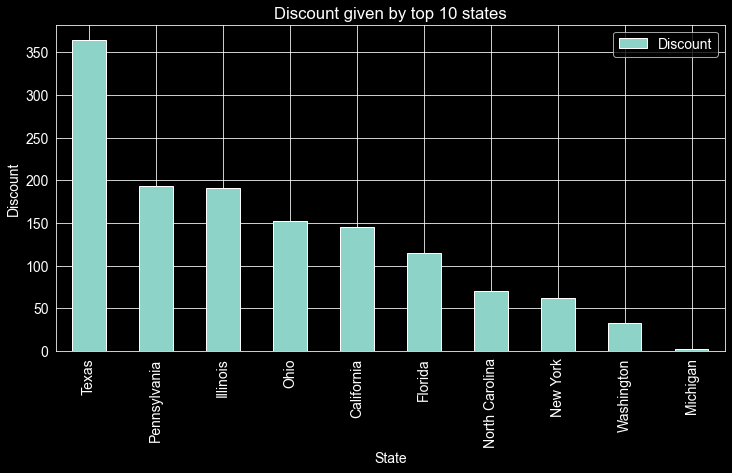

In [36]:
# Ploting the graph for maximum discount given by top 10 states.

plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (12,6)
retail4.head(10).sort_values("Discount", ascending = False).plot(kind='bar', x= "State", y= "Discount")
plt.title("Discount given by top 10 states")
plt.ylabel("Discount")

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN SALES AND PROFIT')

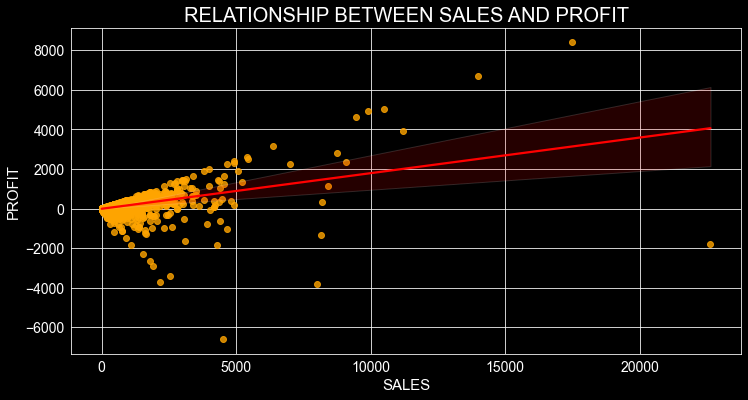

In [37]:
plt.style.use('dark_background')
plt.subplots(figsize=(12,6))
sns.regplot(x=retail['Sales'],y=retail['Profit'],color='orange',line_kws={'color':'red'})
plt.xlabel("SALES",fontdict={'color':'white','fontsize':15})
plt.ylabel("PROFIT",fontdict={'color':'white','fontsize':15})
plt.title("RELATIONSHIP BETWEEN SALES AND PROFIT",fontdict={'color':'white','fontsize':20})

### Again from the scatterplot we see that there is a positively sloped trendline which concludes a strong positive relationship between Sales and Profit.

count     9977.000000
mean       230.148902
std        623.721409
min          0.444000
25%         17.300000
50%         54.816000
75%        209.970000
max      22638.480000
Name: Sales, dtype: float64


<AxesSubplot:xlabel='Sales', ylabel='Density'>

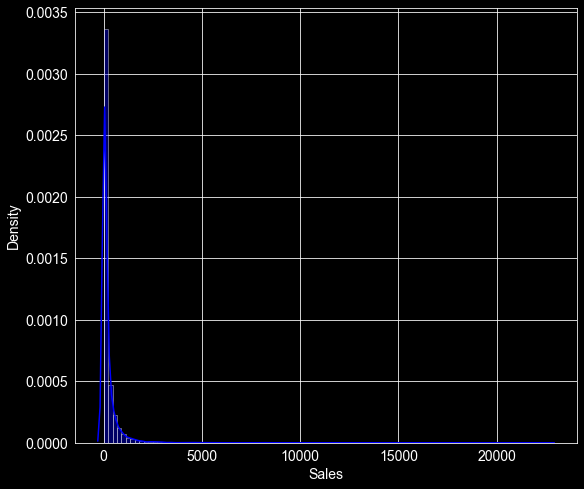

In [38]:
print(retail['Sales'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(retail['Sales'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4})

## INSIGHTS :
### 1.MAXIMUM TRANSACTIONS were made in WEST REGION
### 2.MAXIMUM SALES in WEST REGION
### 3.MAXIMUM PROFITS in WEST REGION
### 4.MAXIMUM SALES AND PROFIT in CONSUMER SEGMENT
### 5.MAXIMUM TRANSACTIONS were shipped in STANDARD CLASS irrespective of SEGMENT
### 6.LEAST PROFIT is incurred in FURNITURE CATEGORY irrespective of good amount of Sales
### 7.Under FURNITURE, TABLES and BOOKCASES are INCURRING LOSSES which is effecting the TOTAL PROFIT of Furniture Category
### 8.HIGH DISCOUNT is being offered in TABLES and BOOKCASES which is somewhere the probable reason of losses.
### 9.City Contributing to the maximum profit and sales is NEW YORK City
### 10. Maximum discount is given in the city of Philadelphia
### 11. Philadelphia contributes least towards profit
### 12.POSITIVE CORRELATION:Profit and Sales
### 13.NEGATIVE CORRELATION:Profit and Discount
### 14.LESS the DISCOUNT ,MORE the PROFIT and vice-versa

# CONCLUSION :
## From Above Observation we conclude that FURNITURE CATEGORY is the WEAK AREA where we need to work upon. As in Furniture we have TABLES and BOOKCASES where due to HIGH DISCOUNT offered we are incurring LOSSES. So we need to REDUCE the DISCOUNT in order to  INCREASE the PROFIT. 
## Maximum discounts are given to Philadelphia followed by Houston and Chicago.Despite this fact Philadelphia is contributing  the least towards profit followed by Houston so we can reduce the discounts given to this cities.